In [1]:
import numpy as np
import sys

sys.path.append('../src')

import cpu
import program
import importlib
cpu = importlib.reload(cpu)
program = importlib.reload(program)

p = program.Program.from_file('../programs/initial_program.txt')
p_snake = program.Program.from_file('../programs/snake_game.txt')
p_first = program.Program.from_file('../programs/first_program.txt')
p_2 = program.Program.from_file('../programs/program2.txt')
p_branch = program.Program.from_file('../programs/branch_program.txt')
p = program.Program.from_array(np.array(['a9', 'c0', 'aa', 'e8', '69', 'c4', '00']))
p_push = program.Program.from_array(np.array(['a2', '00', 'a0', '00', '8a', '99', '00', '02', '48', 'e8', 'c8', 'c0', '10', 'd0', 'f5', '68', '99', '00', '02', 'c8', 'c0', '20', 'd0', 'f7']))
p_pull = program.Program.from_array(np.array(['99', '00', '02', 'c8', 'c0', '20', 'd0', 'f7']))
p_jump = program.Program.from_file('../programs/jump_program.txt')
p_jsr_rts = program.Program.from_file('../programs/jsr_rts.txt')

In [2]:
# Initialise CPU
daveNES = cpu.MOS6502(debug = True)
daveNES.initialise_RAM()


In [3]:
daveNES.load_program(p_snake)
daveNES.reset()

PC: 0x0600, SP: 0xff, A: 0x00, X: 0x00, Y: 0x00, [0, 0, 0, 0, 0, 0, 0]


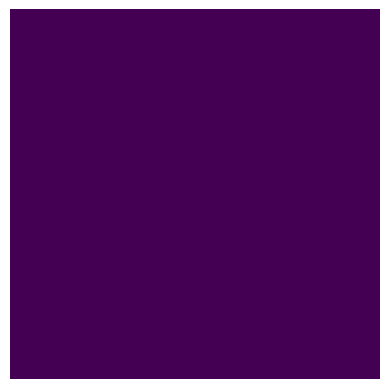

In [4]:
daveNES.run_program()
#daveNES.ram.visualise_memory()
#print(daveNES.ram.memory[0x0200: 0x0205])
daveNES.reset()

In [ ]:
daveNES.ram.visualise_memory()
